1. Project Title

Predicting Attorney Involvement in Insurance Claims Using Machine Learning.

2. Business Context

In the insurance industry, claims involving attorneys tend to increase costs and prolong the settlement process. Identifying factors that contribute to attorney involvement can help insurers take preventive measures, improve customer communication, and streamline claim resolution processes.
By using Machine Learning, we aim to predict the likelihood of attorney involvement in an insurance claim based on key factors such as claimant demographics, seatbelt usage, insurance coverage, and claim loss.


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,recall_score,precision_score,accuracy_score,roc_auc_score,classification_report,roc_curve

In [3]:
claim_data = pd.read_csv("claimants.csv")

In [4]:
claim_data.dropna(axis=0,inplace=True)

In [5]:
claim_data.shape

(1096, 7)

### Model Building

In [6]:
## Import Decision Tree Model
from sklearn.tree import DecisionTreeClassifier

In [14]:
# data splitting

x= claim_data.drop('ATTORNEY',axis = 1)
y = claim_data['ATTORNEY']

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=12)

In [27]:
dt_model = DecisionTreeClassifier(criterion='gini',max_depth=5)

In [28]:
dt_model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

### Prediction

In [29]:
y_pred = dt_model.predict(x_test)

#### Evaluate the Model


In [30]:
accuracy_score(y_test,y_pred)

0.7272727272727273

#### Look at tree information


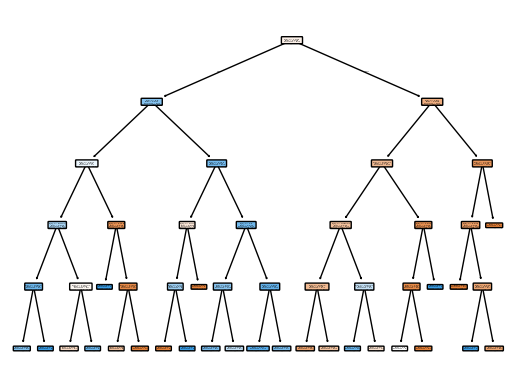

In [32]:
from sklearn.tree import plot_tree
plot_tree(dt_model,rounded = True,filled = True)
plt.show()

#### Grid Search CV

In [31]:
from sklearn.model_selection import GridSearchCV

In [36]:
param_grid = {'criterion':['gini','entropy'],'max_depth':[3,4,5,6,7,8,9,10]}

In [42]:
grid_serch_cv = GridSearchCV(estimator=dt_model,param_grid = param_grid,cv = 5)

In [43]:
grid_serch_cv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=5),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10]})

In [45]:
grid_serch_cv.best_params_

{'criterion': 'gini', 'max_depth': 4}

In [46]:
grid_serch_cv.best_score_

np.float64(0.7283181818181819)

In [47]:
grid_serch_cv.best_estimator_

DecisionTreeClassifier(max_depth=4)